<a href="https://colab.research.google.com/github/imTheDevil/healthcare_costs_calculator/blob/main/healthcare_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Importing required libraries, modules
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version (Use this if u use colab)
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# Getting dataset
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')

In [42]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [43]:
dataset.isna().sum()#Checking if the dataset contain unknown values

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [44]:
#Converting categorical data to numeric
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']
for i in CATEGORICAL_COLUMNS:
  dataset[i] = dataset[i].astype('category').cat.codes

In [45]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [46]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2)
train_labels = train_dataset.pop("expenses")
test_labels = test_dataset.pop("expenses")

In [50]:
train_stats = train_dataset.describe().transpose()#training data statistics 
train_stats

,count,mean,std,min,25%,50%,75%,max
age,1070.0,39.426168,13.885529,18.0,27.0,39.0,51.0,64.0
sex,1070.0,0.517757,0.499918,0.0,0.0,1.0,1.0,1.0
bmi,1070.0,30.674019,6.087454,16.8,26.3,30.4,34.6,53.1
children,1070.0,1.101869,1.203323,0.0,0.0,1.0,2.0,5.0
smoker,1070.0,0.214019,0.410332,0.0,0.0,0.0,0.0,1.0
region,1070.0,1.501869,1.109318,0.0,1.0,2.0,2.0,3.0


In [51]:
normalizer = tf.keras.layers.Normalization(axis=-1)#Creating a 'normalization' layer
normalizer.adapt(np.array(train_dataset))#fitting the state of the 'normalization' layer to the train_dataset
print(normalizer.mean.numpy())

[[39.42617     0.517757   30.674017    1.1018692   0.21401864  1.5018692 ]]


In [63]:
#Building the model
model = keras.Sequential([
                          normalizer,
                          layers.Dense(2),  
                          layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.1),
              loss='mae',
              metrics=['mae', 'mse'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 6)                13        
 ion)                                                            
                                                                 
 dense_20 (Dense)            (None, 2)                 14        
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 30
Trainable params: 17
Non-trainable params: 13
_________________________________________________________________


In [ ]:
#Training the model
model.fit(train_dataset, train_labels, shuffle = True, epochs = 100, validation_split=0.2)

9/9 - 0s - loss: 3263.3267 - mae: 3263.3267 - mse: 45169972.0000 - 29ms/epoch - 3ms/step
Testing set Mean Abs Error: 3263.33 expenses


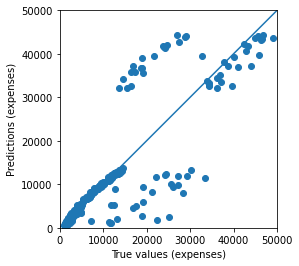

In [66]:
# Testing the model
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

# Ploting predictons
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
